# Course: Foundations of Machine Learning Frameworks
## Practical Lab 1 - Univariate Linear Regression on the California Housing Prices Dataset
### *Name: Neha Yadav*
### *Ran Feldesh*
### Due date: 22nd Sept,24

### 1. Framing the Problem:
- The aim of this lab is to carry out basic linear regression tests on the first variable, the California housing prices data set. We aim to understand how median house values are influenced by three independent variables: The three factors that should be considered include; average income, demography, and number of families. Through observing the above relationships these variables that have an effect on the price of houses can be determined.

### 2. Getting the Data:
- The data used here is California Housing Prices data set which is a popular data set that provides information the prices of houses in the districts in California. In our data analysis process, it is convenient to work with a Pandas DataFrame, so we will load this dataset into it.

In [73]:
import pandas as pd

# Load the dataset
housing_data = pd.read_csv('./housing.csv')
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 3. Exploratory Data Analysis (EDA)

**A. Statistics:**
- The following function gives the average or mean, standard deviation, and min as well as max values of each feature in the dataset.

In [74]:
# Display basic statistics with styled borders
stats = housing_data.describe()

# Apply table styling for borders
styled_stats = stats.style.set_table_styles(
    [{'selector': 'table', 'props': [('border-collapse', 'collapse'), ('border', '2px solid black')]},
     {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '5px')]}]
)

# Display the styled table
styled_stats


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**B. Scatter Plots (Median House Value vs. Independent Variables)**
- We will create scatter plots to visually analyze the relationships between median house value and each of the independent variables: average income, population, and the count of households.

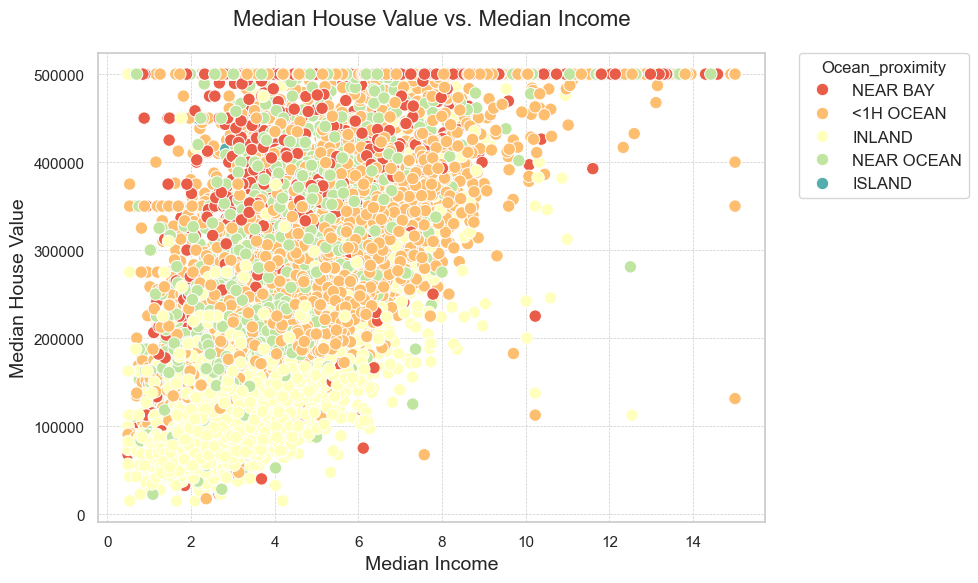

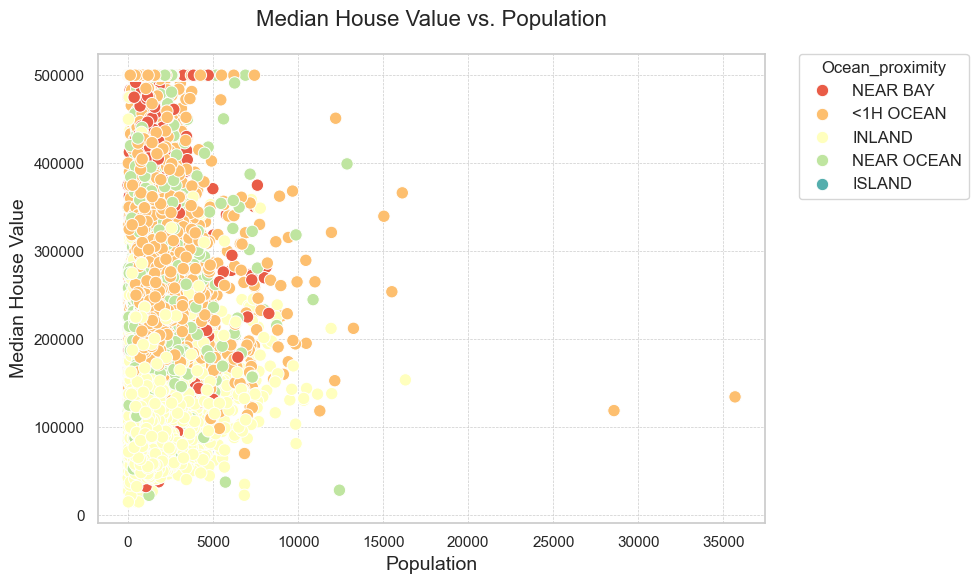

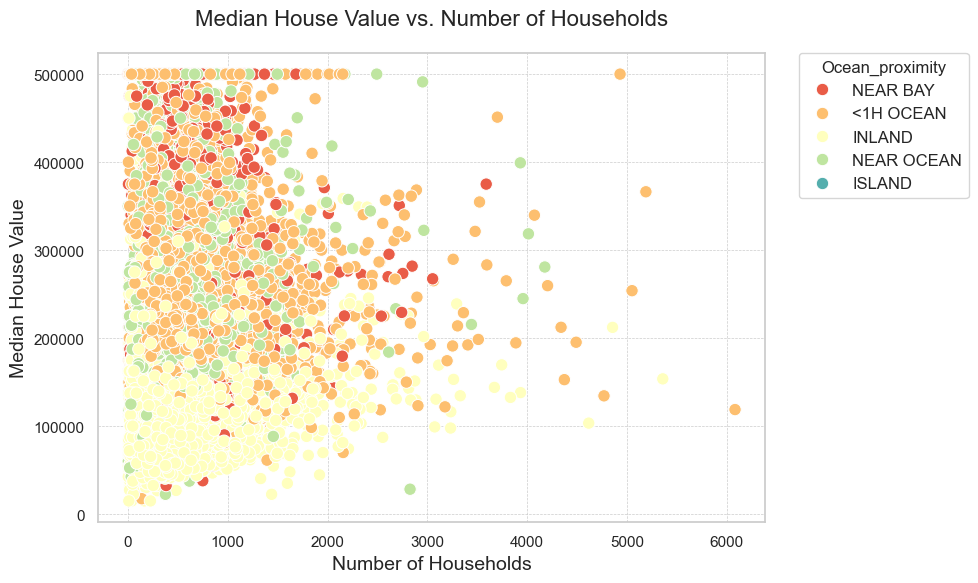

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a global theme for Seaborn plots
sns.set_theme(style="whitegrid")

# Define a function to create scatter plots with enhancements
def plot_scatter_with_hue(x_var, y_var, hue_var, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        x=x_var, 
        y=y_var, 
        data=housing_data, 
        hue=hue_var, 
        palette='Spectral',  # Colorful palette for differentiation
        edgecolor='w',  # White border around points for better contrast
        s=80  # Size of the markers
    )
    
    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Add title and labels with enhanced fonts
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # Customize the legend and move it outside the plot
    plt.legend(title=hue_var.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
    
    # Make sure everything fits properly
    plt.tight_layout()
    plt.show()

# Create scatter plot for median house value vs. median income with hue
plot_scatter_with_hue(
    x_var='median_income', 
    y_var='median_house_value', 
    hue_var='ocean_proximity', 
    title='Median House Value vs. Median Income', 
    xlabel='Median Income', 
    ylabel='Median House Value'
)

# Create scatter plot for median house value vs. population with hue
plot_scatter_with_hue(
    x_var='population', 
    y_var='median_house_value', 
    hue_var='ocean_proximity', 
    title='Median House Value vs. Population', 
    xlabel='Population', 
    ylabel='Median House Value'
)

# Create scatter plot for median house value vs. number of households with hue
plot_scatter_with_hue(
    x_var='households', 
    y_var='median_house_value', 
    hue_var='ocean_proximity', 
    title='Median House Value vs. Number of Households', 
    xlabel='Number of Households', 
    ylabel='Median House Value'
)


**C. Interpretation of Graphs**
- Median House Value vs. Median Income: This means that this scatter plot has a positive correlation. In the chart below we can observe a rather positive correlation between the median income and the median house value, which suggests that the price of the house increases with the level of income per capita in any region.
- Median House Value vs. Population: As for the relationship it seem less certain. Despite the fact that house prices appear to increase with the size of the population as captured by population density there is hint of increase in dispersion indicating that the size of the population may not necessarily be an indirect measure of the value of house prices.
- Median House Value vs. Number of Households: Unlike the population, the connection does not appear nearly as robust as with median income. However, it shows slightly higher, which means that places with more households might have a higher price of housing, though with greater fluctuations.

**D. Description of the Variables**
- Median House Value: This was the dependent variable, the median of the house values in every district. It reaches from $14,999 to $500,001. 
- Median Income: An independent variable for the median income in the districts forms a continuous variable that range from 0.5 to around 15. A measure of price index that has the least and the highest extent impacting on the demand of houses.
- Population: An independent variable meaning population density in each district, ranging from less populated districts to districts containing more than 35000 of people Such population influences the housing demand yet not the prices.
- Households: Another independent variable which is the number of households per district ranging from nearly 2 to in excess of 5,000 which, although related to population may reflect different demand for housing.

#### 4. Running Linear Regressions & 5. Regression Results Table

A linear regression analysis will be carried out to examine how the median house value is related to each independent variable.

In [76]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

def run_regression(independent_var):
    X = sm.add_constant(housing_data[independent_var])  # Add constant for intercept
    y = housing_data['median_house_value']
    
    model = sm.OLS(y, X).fit()
    
    # Predictions
    predictions = model.predict(X)
    
    # Calculate errors
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    
    # Return intercept, slope, mse, and mae using iloc
    return model.params.iloc[0], model.params.iloc[1], mse, mae  # Intercept, Slope, MSE, MAE

# Run regressions for each independent variable
results = {}
for var in ['median_income', 'population', 'households']:
    results[var] = run_regression(var)

# Create a DataFrame from the results
results_df = pd.DataFrame.from_records(list(results.values()), 
                                       index=results.keys(), 
                                       columns=['Intercept', 'Slope', 'MSE', 'MAE'])

# Styling the DataFrame
styled_results_df = results_df.style.set_table_attributes('style="width: 50%; margin: auto;"') \
    .set_caption("Regression Results") \
    .highlight_max(axis=0, color='lightgreen') \
    .highlight_min(axis=0, color='salmon') \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold'), ('color', 'black')]
    }, {
        'selector': 'th.row0',
        'props': [('background-color', '#d9e6f2'), ('color', 'black')]
    }, {
        'selector': 'th.row1, th.row2',
        'props': [('background-color', '#d9e6f2'), ('color', 'black')]
    }, {
        'selector': 'td',
        'props': [('color', 'black')]
    }, {
        'selector': 'tr:last-child td',
        'props': [('background-color', '#d9e6f2')]
    }])

# Display the styled DataFrame
styled_results_df

,Intercept,Slope,MSE,MAE
median_income,45085.576703,41793.849202,7011311502.929527,62625.933791
population,210436.262076,-2.511753,13307412412.389353,91153.820095
households,196928.577162,19.872775,13257776904.728535,90802.743243


#### 6. Plotting the Regression Lines:
Presently, we are able to include the regression lines in our scatter plots.

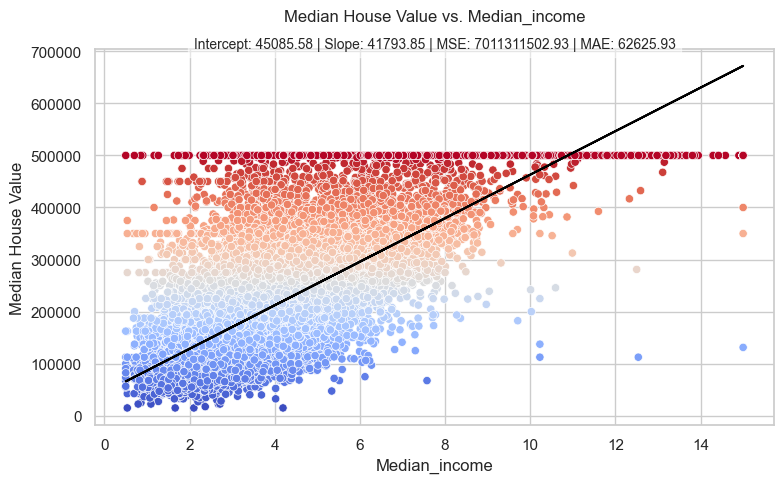

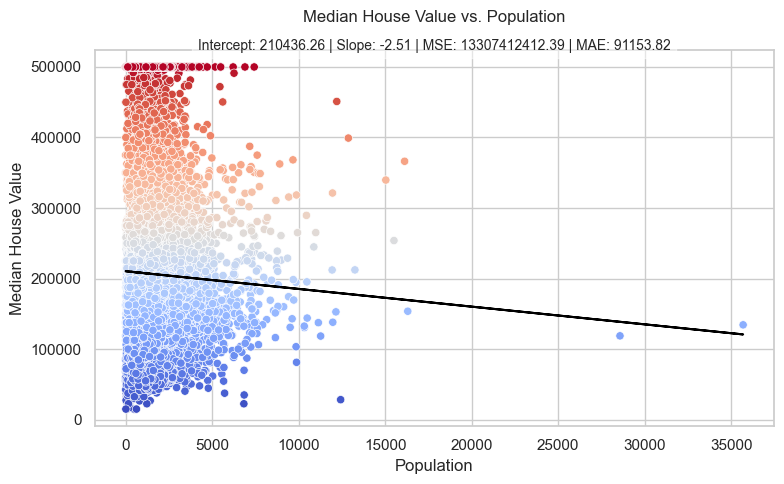

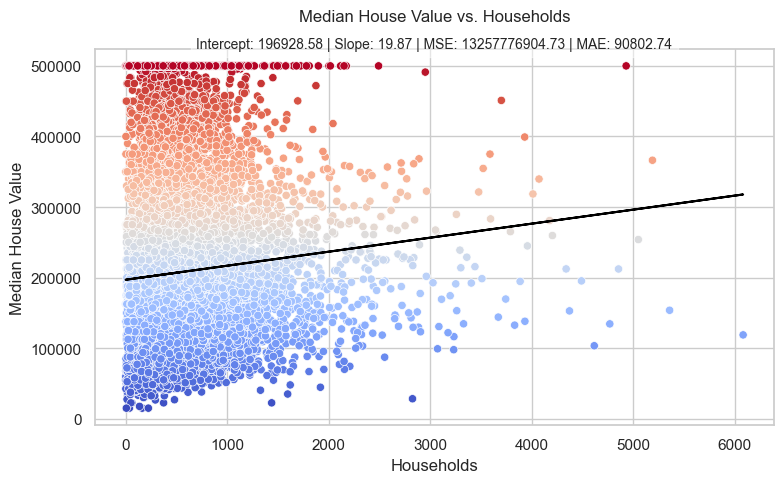

In [77]:
def plot_regression(independent_var, model_params):
    X = housing_data[independent_var]
    y = housing_data['median_house_value']
    
    # Adjust figure size for smaller plot
    plt.figure(figsize=(8, 5))  # Decreased size
    
    # Scatter plot with color hue based on median house value for better visualization
    sns.scatterplot(x=X, y=y, hue=y, palette="coolwarm", legend=False)  # Added 'hue' and 'palette'

    # Regression line
    plt.plot(X, model_params[0] + model_params[1] * X, color='black')  # Keeping the regression line black for contrast

    # Add title with padding
    plt.title(f'Median House Value vs. {independent_var.capitalize()}', pad=20)
    
    # Add the intercept, slope, MSE, MAE info below the title and above the plot
    plt.text(0.5, 1.03, f'Intercept: {model_params[0]:.2f} | Slope: {model_params[1]:.2f} | MSE: {results_df.at[independent_var, "MSE"]:.2f} | MAE: {results_df.at[independent_var, "MAE"]:.2f}', 
             ha='center', va='top', fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(independent_var.capitalize())
    plt.ylabel('Median House Value')
    plt.tight_layout()
    plt.show()

# Plot for each independent variable
for var in ['median_income', 'population', 'households']:
    plot_regression(var, results[var])


### 7. Summary and Conclusion
In light of this, this research applied three variables in a single-variable linear regression research to analyze the average house prices.

- **Goodness-of-Fit:** The report establishes that the median income model was the most precise in forecasting median house values, having lower MSE and MAE values than the other models.
- **Insights:** Even with slight correlation, population size and the specific numbers of households did not influence the variables significantly. This shows that strategies geared towards middle-income groups could raise the value of residential property.

- This report shows the requirement for deeper exploration. The current investigation could lead to other studies that explore the associations among these factors using multivariate regression analysis.

- To sum up:
    - Median income: Housing prices are related to median income, which has a mostly positive predictive influence.
    - Population: The link was unexpected, which limited the ability to predict.
    - Number of Households: The link between household quantity and commuting is relatively weak, and household quantity is reported to be lower than income.

### 8. References:
1. Kaggle. (n.d.). *California housing prices dataset*. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices
2. Poe. (n.d.). *Assistant*. Poe. Retrieved from https://poe.com/Assistant
3. Pandas. (n.d.). *Pandas documentation*. Retrieved from https://pandas.pydata.org/
4. GeeksforGeeks. (n.d.). *Introduction to Seaborn in Python*. Retrieved from https://www.geeksforgeeks.org/introduction-to-seaborn-python/
5. W3Schools. (n.d.). *Matplotlib Pyplot in Python*. Retrieved from https://www.w3schools.com/python/matplotlib_pyplot.asp
6. GeeksforGeeks. (n.d.). *Python introduction to Matplotlib*. Retrieved from https://www.geeksforgeeks.org/python-introduction-matplotlib/
7. Mode Analytics. (n.d.). *Statsmodels in Python tutorial*. Retrieved from https://mode.com/python-tutorial/libraries/statsmodels